

# Project: Investigate No_show appointment Dataset ( for the most important factors in order to predict if a patient will show up for their scheduled appointmen!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>
>This dataset collects information from 100k medical appointments in Brazil and focuse on whether or not the patients are show up for appointment it also provide some information about the patients like (patient id , Gender , Age , neighbourhood ) or if this patient has medical conditions like (hipertension , diabetes ,Alcoholism ,handcap).
>
> we will investigate this dataset to answer main question What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
>we will break our main questions to sub questions in order to answer it :
>
>1)is the age of the patient is associated with patient show up for his medical appointment??
>
>2)is the gender of the patient is associated with patient show up for his medical appointment??
>
>3)if the patient has a medical condition like Diabetes is that associated with patient show up for his medical appointment ??
>
>4)if the patient has a medical condition like Hipertension is that associated with patient show up for his medical appointment ??
>
>5)if the patient has a medical condition like Alcohol addiction is that associated with patient show up for his medical appointment ??
>
>6)if the patient enrolled in Brasilian welfare program is that associated with patient show up for his medical appointment??

In [53]:
# import all of the packages that are important for code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean thedataset for analysis.

### General Properties

In [54]:
#load data 
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
# show the first 5 rows of the dataset
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [55]:
#get information about the dataset to see if there is nan values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [56]:
#see if there is a duplication in the dataset
df.duplicated().sum()

0

In [57]:
#describtion of the data set 
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


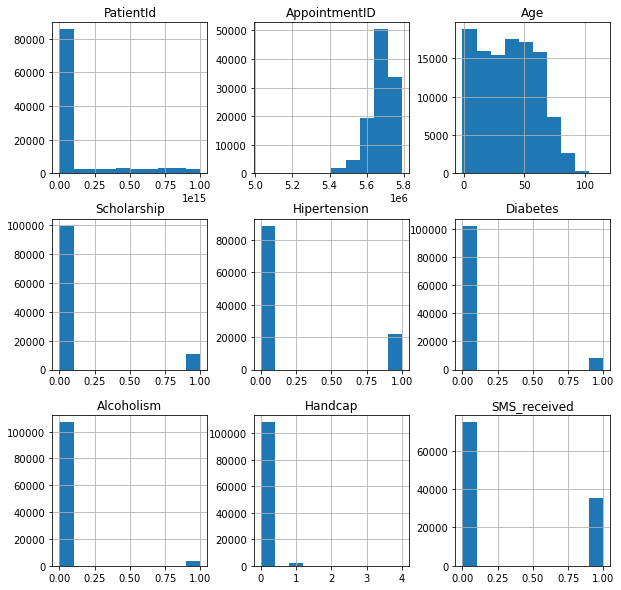

In [58]:
#plot histogram to explore data 
df.hist(figsize=(10,10));



### Data Cleaning (remove unnecessary columns and uncorrect age)

In [59]:
#in previse cell we saw that age is assignet to -1 which Impossible so we are going to remove that row
#sperate the row that we need to get the index
not_age=df.query('Age == -1')
#remove the row with age -1
df.drop(not_age.index,axis=0,inplace=True)
#make sure that we remove age -1
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
      dtype=int64)

In [60]:
#remove unnecessary columns
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
# make sure that they are removed
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [61]:
#rename No-show columns
df.rename(columns={'No-show':'No_show'},inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

>first lets look at our main variable (no_show)



In [62]:
#first lets have alook about number of showing and not showing patient 
df['No_show'].value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

Text(0, 0.5, 'number of patient')

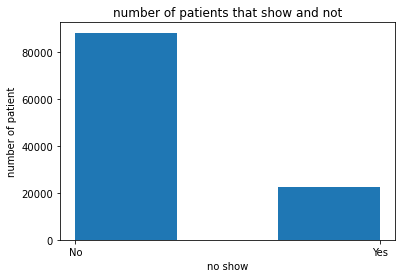

In [63]:
#it seems that patients that showen are much more than patient that not showen 
#visiualize it 
plt.hist(df['No_show'],bins=3 )
plt.title('number of patients that show and not')
plt.xlabel('no show')
plt.ylabel('number of patient')


### Research Question 1 (is the age of the patient is associated with patient show up for his medical appointment??)
>
>to solve this question we will start with sperate the dataset into two datasets one with show up patient and one with not show up patient and then get the mean age for both of them to compaire between them 

In [64]:
#relation between showen up and the age
# make two data fram for show up and not show up patients 
show_up=df.query('No_show == "No"')
not_show_up=df.query('No_show == "Yes"')
not_show_up.head()


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,M,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,F,40,CONQUISTA,1,0,0,0,0,0,Yes
20,F,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


In [65]:
#get the mean age for both categories 
mean_show_up_age=show_up["Age"].mean()
mean_not_show_up_age=not_show_up['Age'].mean()
mean_age=[mean_show_up_age,mean_not_show_up_age]
mean_age


[37.790504154999034, 34.31766656212196]

### Conclusions for Research Question 1 
>it seems that the patient that show up are a little bit older that the patients that is not show up 

Text(0, 0.5, 'mean Age')

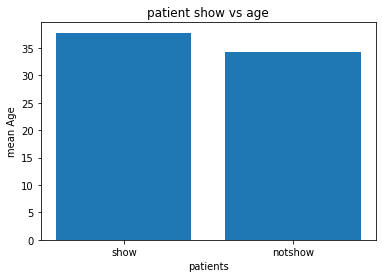

In [66]:
#it seems that the patient that show up are a little bit older that the patients that is not show up 
#plot the relation 
plt.bar(df['No_show'].unique() ,mean_age,tick_label=['show','notshow'])
plt.title('patient show vs age')
plt.xlabel('patients')
plt.ylabel('mean Age')

### Research Question 2  (is the gender of the patient is associated with patient show up for his medical appointment??)

In [67]:
# get counts for showing or not showing in each gender 
gender_count=df.groupby(['Gender']).No_show.value_counts()
gender_count


Gender  No_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

In [68]:
#get total counts for each gender 
gender_total=df['Gender'].value_counts()
gender_total

F    71839
M    38687
Name: Gender, dtype: int64

In [69]:
#gett proportion of female be divide rating count by total count 
Female_proportions=gender_count['F']/gender_total['F']
Female_proportions

No_show
No     0.796851
Yes    0.203149
Name: No_show, dtype: float64

In [70]:
#gett proportion of male be divide rating count by total count 
male_proportions=gender_count['M']/gender_total['M']
male_proportions

No_show
No     0.800321
Yes    0.199679
Name: No_show, dtype: float64

### Conclusions for Research Question 2
>it seems that gender isnot that much effective in association of patients show up for their medical appointment

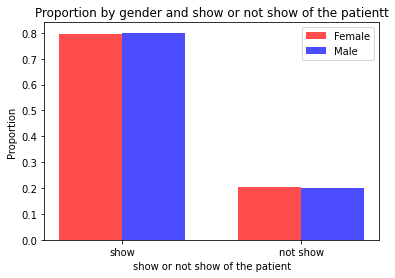

In [71]:
# the x locations for the groups
ind = np.arange(len(Female_proportions))  
# the width of the bars
width = 0.35       

# plot bars
Female_bars = plt.bar(ind, Female_proportions, width, color='r', alpha=.7, label='Female')
Male_bars = plt.bar(ind + width, male_proportions, width, color='b', alpha=.7, label='Male')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('show or not show of the patient')
plt.title('Proportion by gender and show or not show of the patientt')
locations = ind + width / 2  # xtick locations
labels = ['show','not show']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

### Research Question 3 (if the patient has a  medical condition like Diabetes is that associated with patient show up for his medical appointment ??)
>
>to solve this we first start to sperate the pateints that have diabetes on another dataset , get number of patients that show and not then plot the result

In [72]:
#first lets sperate the pateints that have diabetes on another dataset
have_diabetes=df.query('Diabetes == 1')
have_diabetes.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
36,F,63,SÃO CRISTÓVÃO,0,1,1,0,0,0,No
37,F,64,TABUAZEIRO,1,1,1,0,0,0,No
41,F,71,MARUÍPE,0,0,1,0,0,0,No
44,F,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes


In [73]:
#get number of patients that show and the number of patients that not show  while have diabetes
have_diabetes['No_show'].value_counts()

No     6513
Yes    1430
Name: No_show, dtype: int64

### Conclusions for Research Question 3
>it seems that alot of patients that have  diabetes more likely to show for there appointment 

In [75]:
#function to use in plot distribution 
def distribution(db,column,name):
    plt.bar(db[column].unique() ,db[column].value_counts(),tick_label=['show','notshow'])
    plt.title('associate of {} on patients show for their appointments'.format(name)) 
    plt.xlabel('show or not show of the patients') 
    plt.ylabel('number of patients')


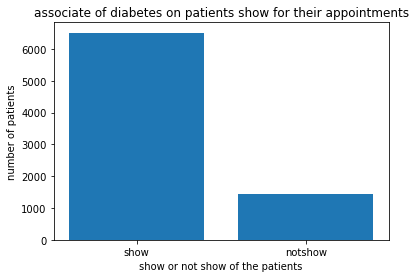

In [76]:
# it seems that alot of patients that have  diabetes more likely to show for there appointment 
#plot relation between show of the patient and have diabetes 
distribution(have_diabetes,'No_show','diabetes')

### Research Question 4 (if the patient has a  medical condition like Hipertension is that associated with patient show up for his medical appointment ??)
>
>to solve this we first start to sperate the pateints that have Hipertension on another dataset , get number of patients that show and not then plot the result

In [77]:
#first lets sperate the pateints that have Hipertension on another dataset
have_Hipertension =df.query('Hipertension  == 1')
have_Hipertension.shape

(21801, 10)

In [78]:
#get number of patients that show and the number of patients that not show  while have Hipertension
have_Hipertension['No_show'].value_counts()

No     18029
Yes     3772
Name: No_show, dtype: int64

### Conclusions for Research Question 4
>it seems that alot of patients that have Hipertension more likely to show for there appointment 

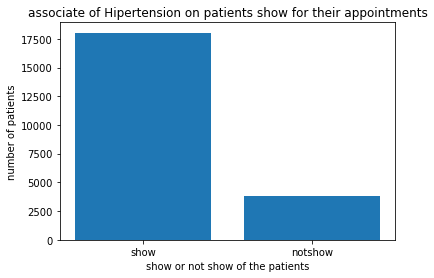

In [79]:
# it seems that alot of patients that have Hipertension more likely to show for there appointment 
#plot relation between show of the patient and have Hipertension 
distribution(have_Hipertension,'No_show','Hipertension')

### Research Question 5 (if the patient has a  medical condition like Alcohol addiction is that associated with patient show up for his medical appointment ??)
>
>to solve this we first start to sperate the pateints that have Alcoholism on another dataset , get number of patients that show and not then plot the result

In [80]:
#first lets sperate the pateints that have Alcoholism on another dataset
have_Alcoholism =df.query('Alcoholism == 1')
have_Alcoholism.shape

(3360, 10)

In [81]:
#get number of patients that show and the number of patients that not show  while have Hipertension
have_Alcoholism['No_show'].value_counts()

No     2683
Yes     677
Name: No_show, dtype: int64

### Conclusions for Research Question 5
>it seems that alot of patients that have Alcohol addiction more likely to show for there appointment 

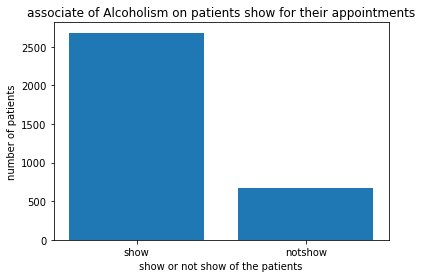

In [82]:
# it seems that alot of patients that have Alcohol addiction more likely to show for there appointment 
#plot relation between show of the patient and Alcohol addiction 
distribution(have_Alcoholism,'No_show','Alcoholism')

### Research Question 6  (if the patient enrolled in Brasilian welfare program is that associated with patient show up for his medical appointment??) 
>
>to solve this we first start to sperate the pateints that have scholarship on another dataset , get number of patients that show and not then plot the result


In [83]:
#first lets sperate the pateints that have Scholarship on another dataset
have_Scholarship =df.query('Scholarship == 1')
have_Scholarship.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
12,F,22,NOVA PALESTINA,1,0,0,0,0,0,No
17,F,40,CONQUISTA,1,0,0,0,0,0,Yes
18,F,30,NOVA PALESTINA,1,0,0,0,0,1,No
31,M,12,NOVA PALESTINA,1,0,0,0,0,0,Yes
33,F,38,SÃO CRISTÓVÃO,1,0,0,0,0,1,No


In [84]:
#get number of patients that show and the number of patients that not show  while have Scholarship
have_Scholarship['No_show'].value_counts()

No     8283
Yes    2578
Name: No_show, dtype: int64

### Conclusions for Research Question 6
>it seems that alot of patients that have Scholarship more likely to show for there appointment 

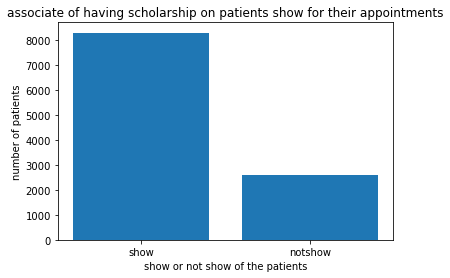

In [85]:
# it seems that alot of patients that have Scholarship more likely to show for there appointment 
#plot relation between show of the patient and have Scholarship
distribution(have_Scholarship,'No_show','having scholarship')

<a id='conclusions'></a>
## Conclusions

> from the above informations that we have the most important factor for us to know in order to predict if a patient will show up for their scheduled appointment is medical condition like (hipertension , diabetes ,Alcoholism) , also if the patient have scholorship and the age but gender isn't that much effictive 



## limitations 
>a very extra useful variable that we don't have is the distance between the patient and the center or clinic that he has the medical appointment in it as the distance is very important factor to work on instead of the neighbourhood name  